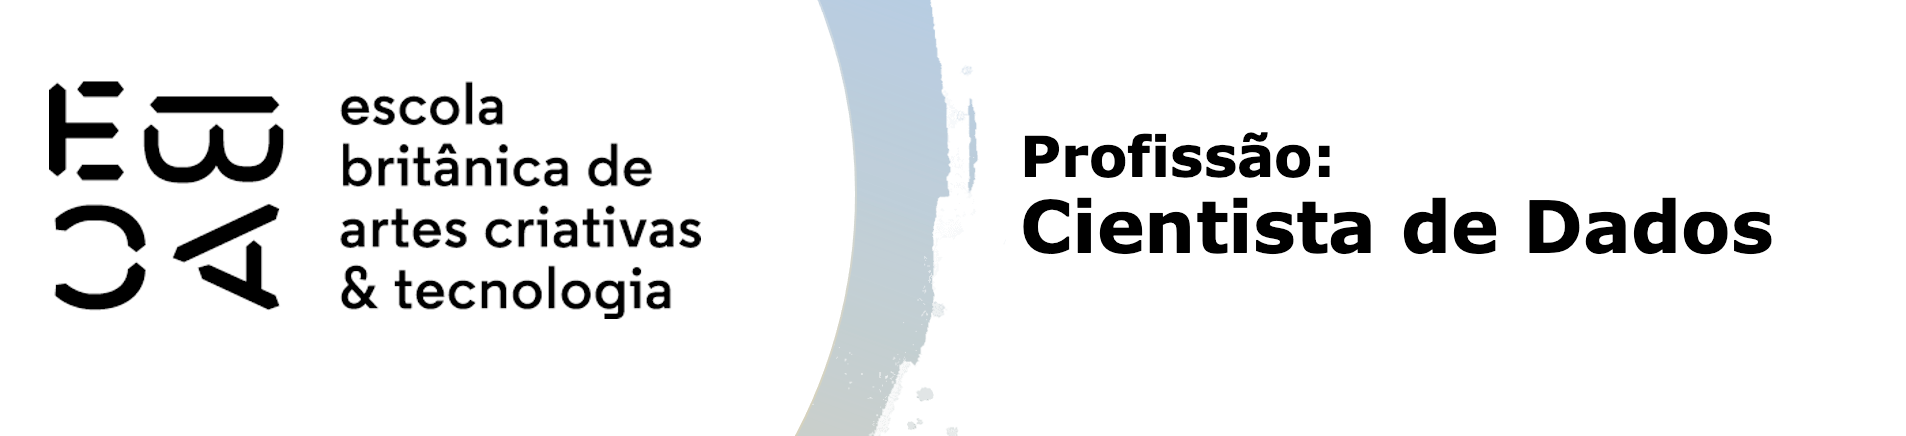

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('online_shoppers_intention.csv')

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [6]:
df["Month"].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [7]:
# Dicionário de mapeamento de meses
month_mapping = {
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "June": 6,
    "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
}

# Substituindo os nomes dos meses pelo número correspondente
df['Month'] = df['Month'].map(month_mapping)

In [8]:
df["VisitorType"].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

In [9]:
# Alterando a coluna VisitorType para um booleano onde 1 é o novo visitante. 

df.rename(columns={'VisitorType': 'NewVisitor'}, inplace=True)

# Excluindo os valores 'Other'
df = df[df['NewVisitor'] != 'Other']

# Definindo o mapeamento diretamente como inteiros
visitor_mapping = {
    'Returning_Visitor': 0,
    'New_Visitor': 1
}

# Aplicando o mapeamento à coluna 'VisitorType' (agora 'NewVisitor')
df['NewVisitor'] = df['NewVisitor'].map(visitor_mapping)

In [10]:
df['Revenue'] = df['Revenue'].astype(np.int64) # Convertendo Bool

In [11]:
df['Weekend'] = df['Weekend'].astype(np.int64) # Convertendo Bool

In [12]:
df.isna().sum() #verificando se há dados faltantes, não há

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
NewVisitor                 0
Weekend                    0
Revenue                    0
dtype: int64

In [13]:
df.dtypes  #todas variáveis agora são numéricas.

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
NewVisitor                   int64
Weekend                      int64
Revenue                      int64
dtype: object

In [14]:
df_qt = df.copy()

C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

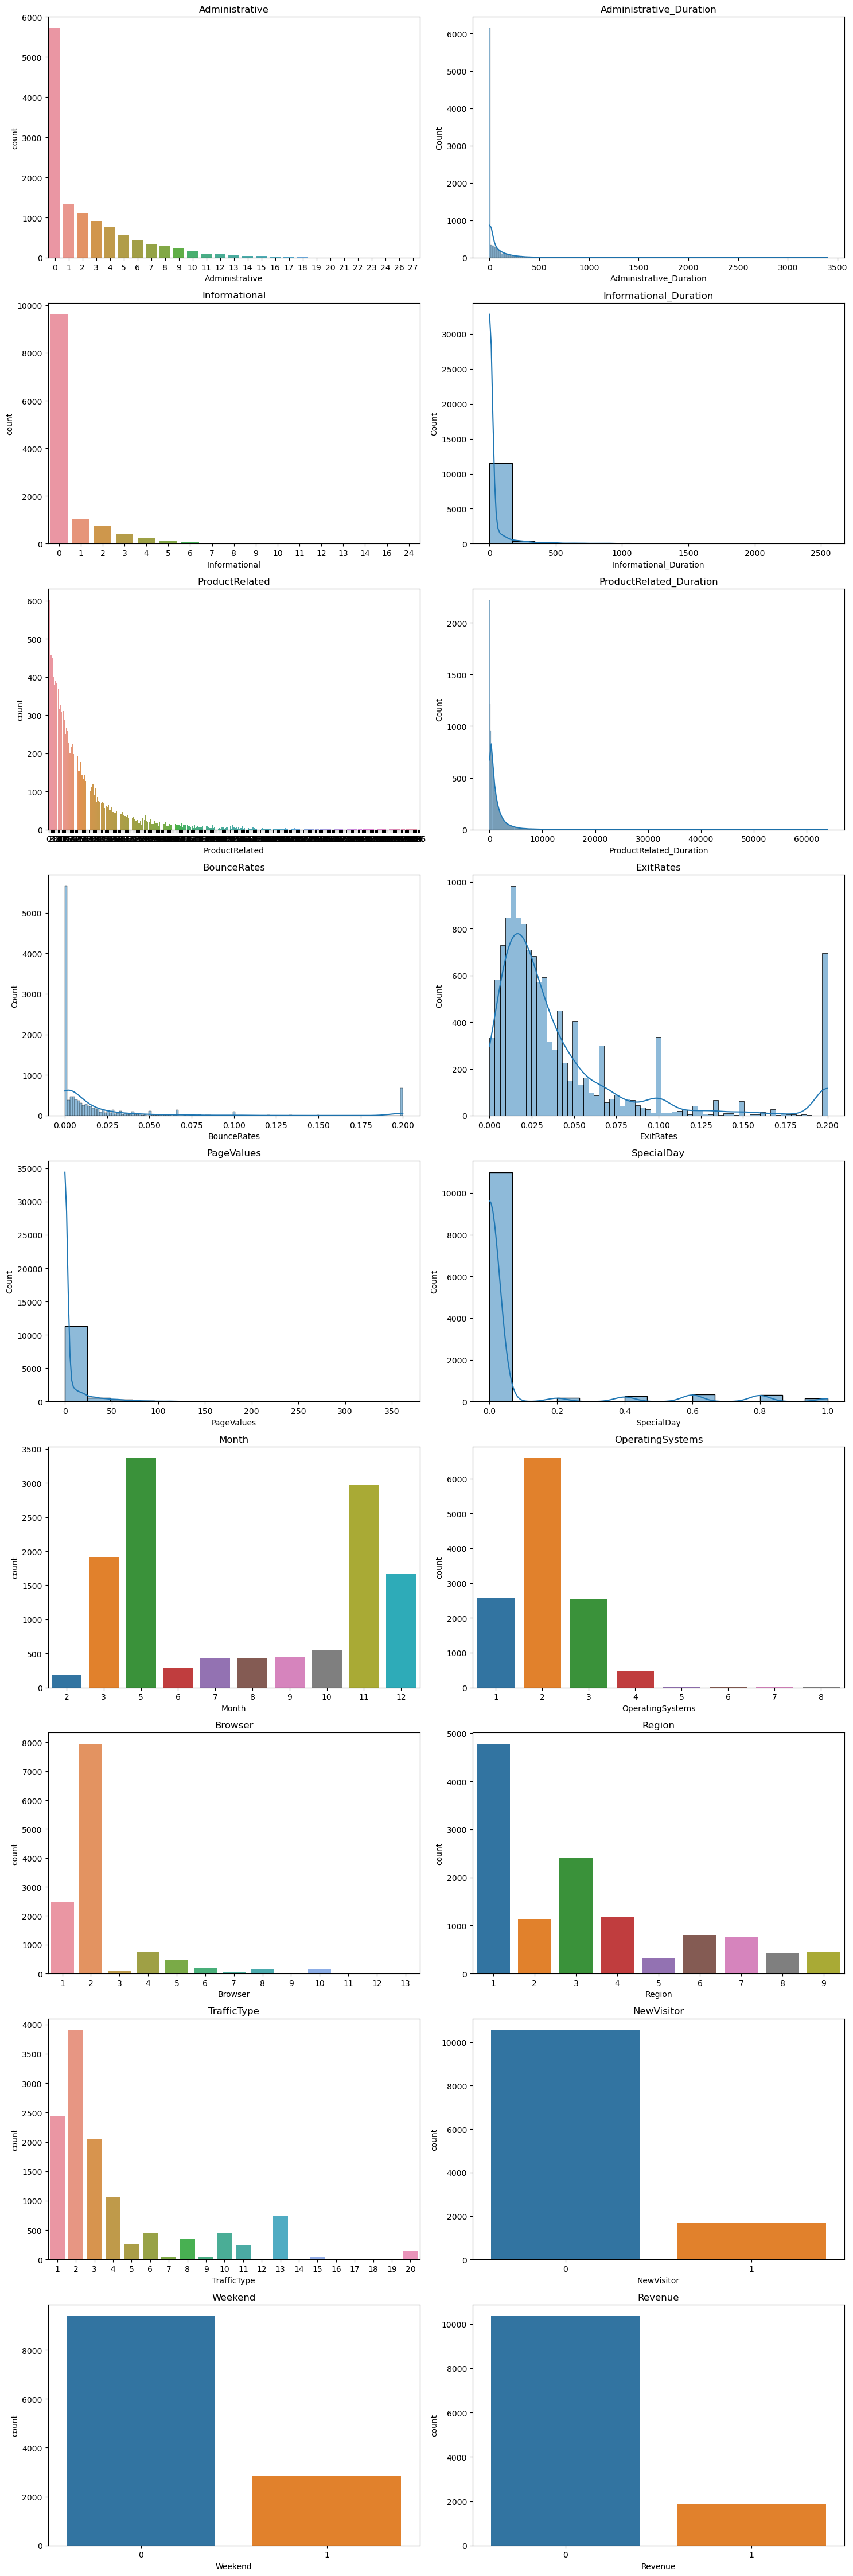

In [15]:
plt.figure(figsize=(15, 45))

# Loop para criar um gráfico para cada variável (coluna)
for i, col in enumerate(df_qt.columns, 1):
    plt.subplot(9, 2, i)  # subplot com 9 linhas e 2 colunas
    
    # Verificar o tipo de dado da coluna
    if df_qt[col].dtype == 'int64':
        sns.countplot(x=col, data=df_qt)
    elif df_qt[col].dtype == 'float64':
        sns.histplot(df_qt[col], kde=True)
    
    plt.title(col)

plt.tight_layout()
plt.show()

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

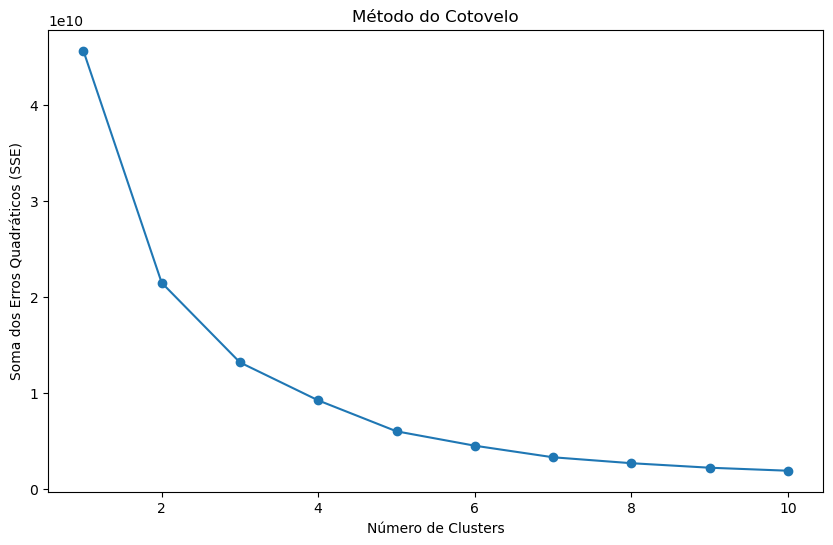

In [16]:
#Utilizando o método do cotovelo:

from sklearn.cluster import KMeans
# Variar o número de clusters de 1 a 10
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1111)
    kmeans.fit(df_qt)
    sse.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Erros Quadráticos (SSE)')
plt.title('Método do Cotovelo')
plt.show()

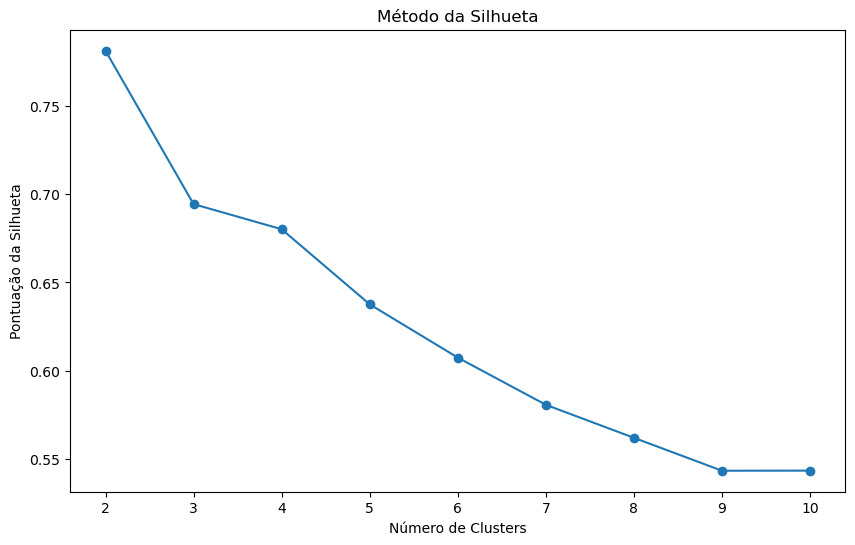

In [17]:
# Utilizando o método da silhueta:

from sklearn.metrics import silhouette_score

# Variar o número de clusters de 2 a 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1122)
    labels = kmeans.fit_predict(df_qt)
    silhouette_scores.append(silhouette_score(df_qt, labels))

# Plotar o gráfico do método da silhueta
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação da Silhueta')
plt.title('Método da Silhueta')
plt.show()

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

### Conclusão: 
O método do cotovelo apresenta o número de clusters ideal entre 2 ou 3, enquanto o método da silhueta indica 2 como sendo a quantidade ideal. Vamos analisar os 2 casos.

In [18]:
from sklearn.cluster import KMeans

# Rodar K-Means com 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
df_qt['cluster_2'] = kmeans_2.fit_predict(df_qt)

# Rodar K-Means com 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df_qt['cluster_3'] = kmeans_3.fit_predict(df_qt)

C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

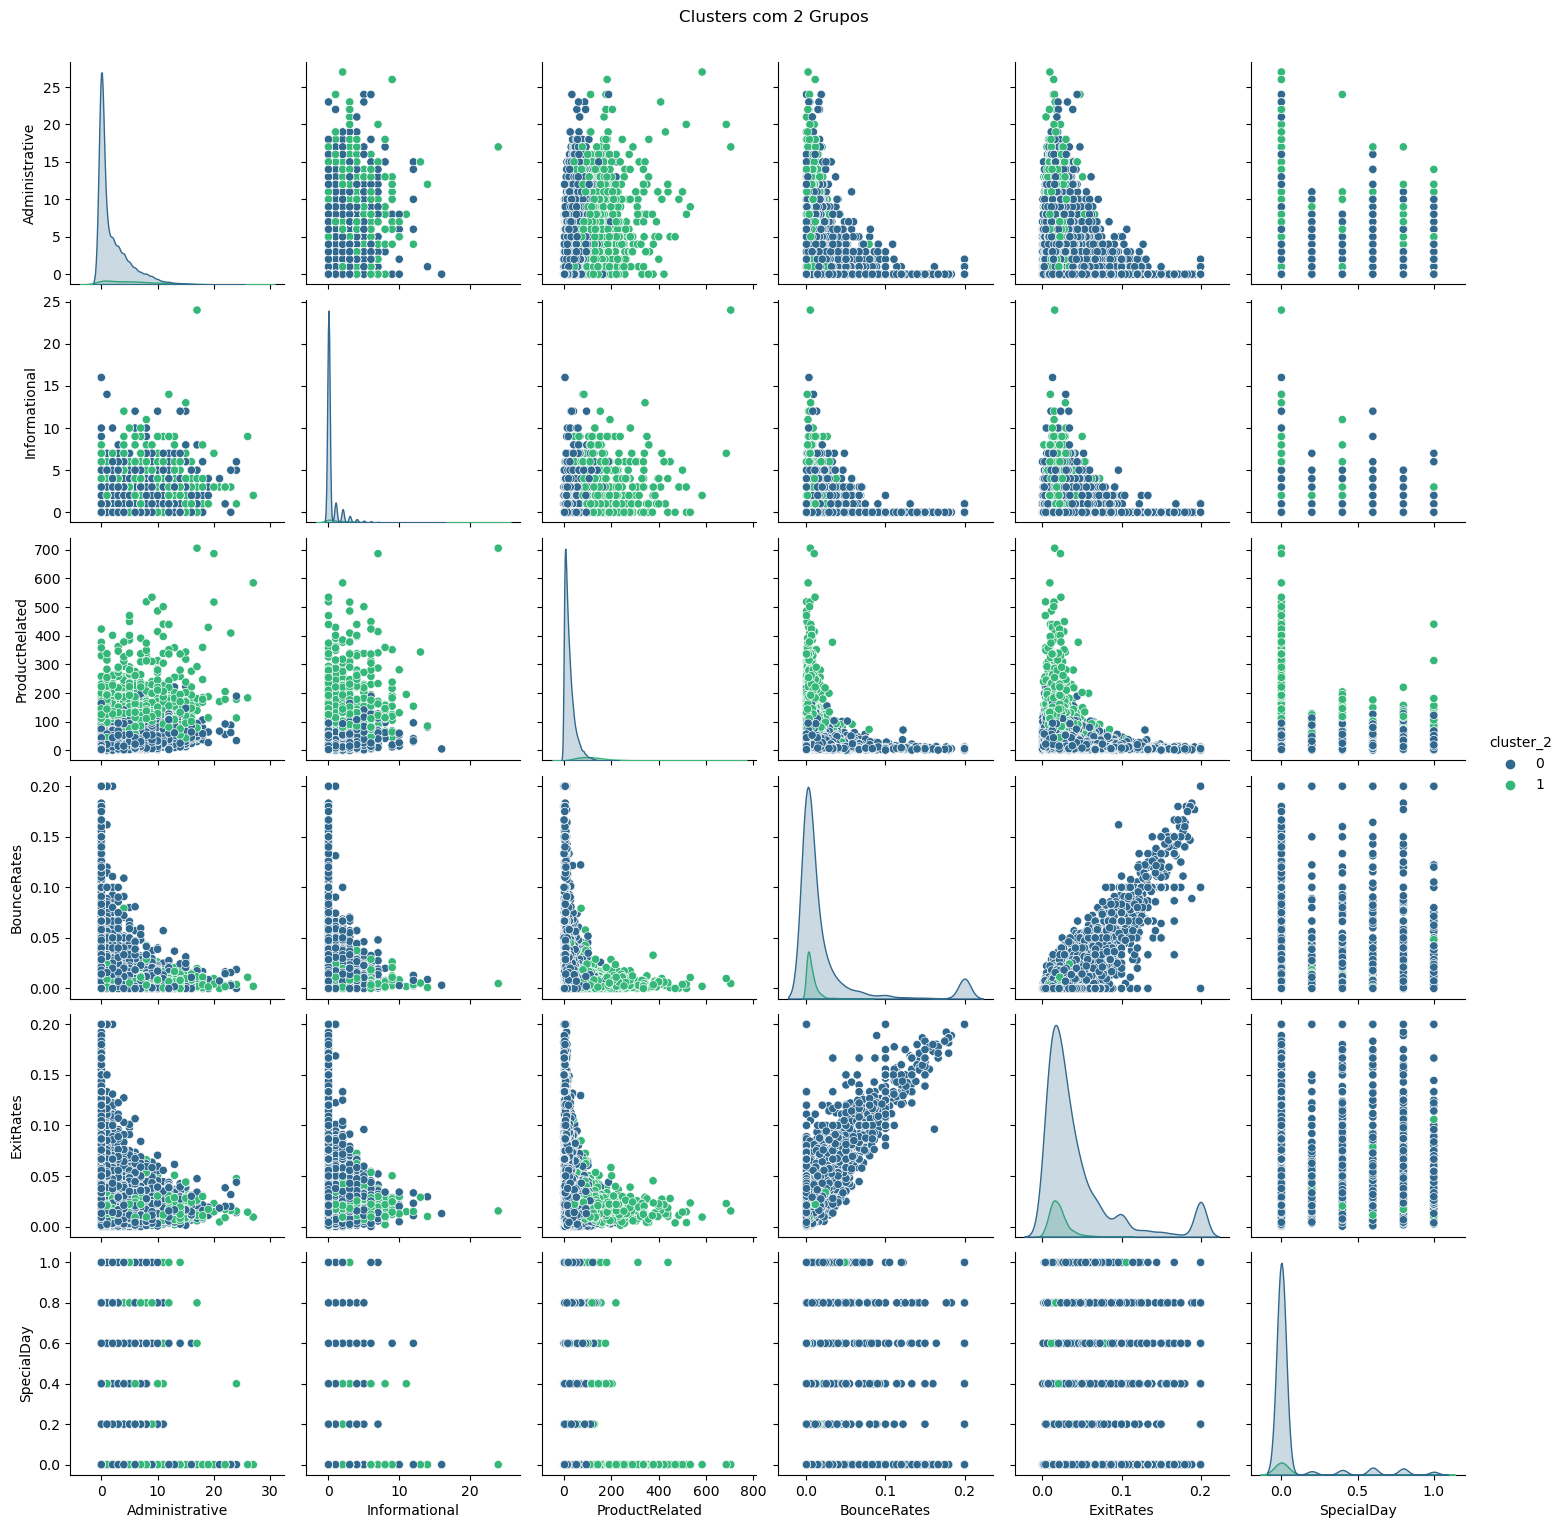

C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rodri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

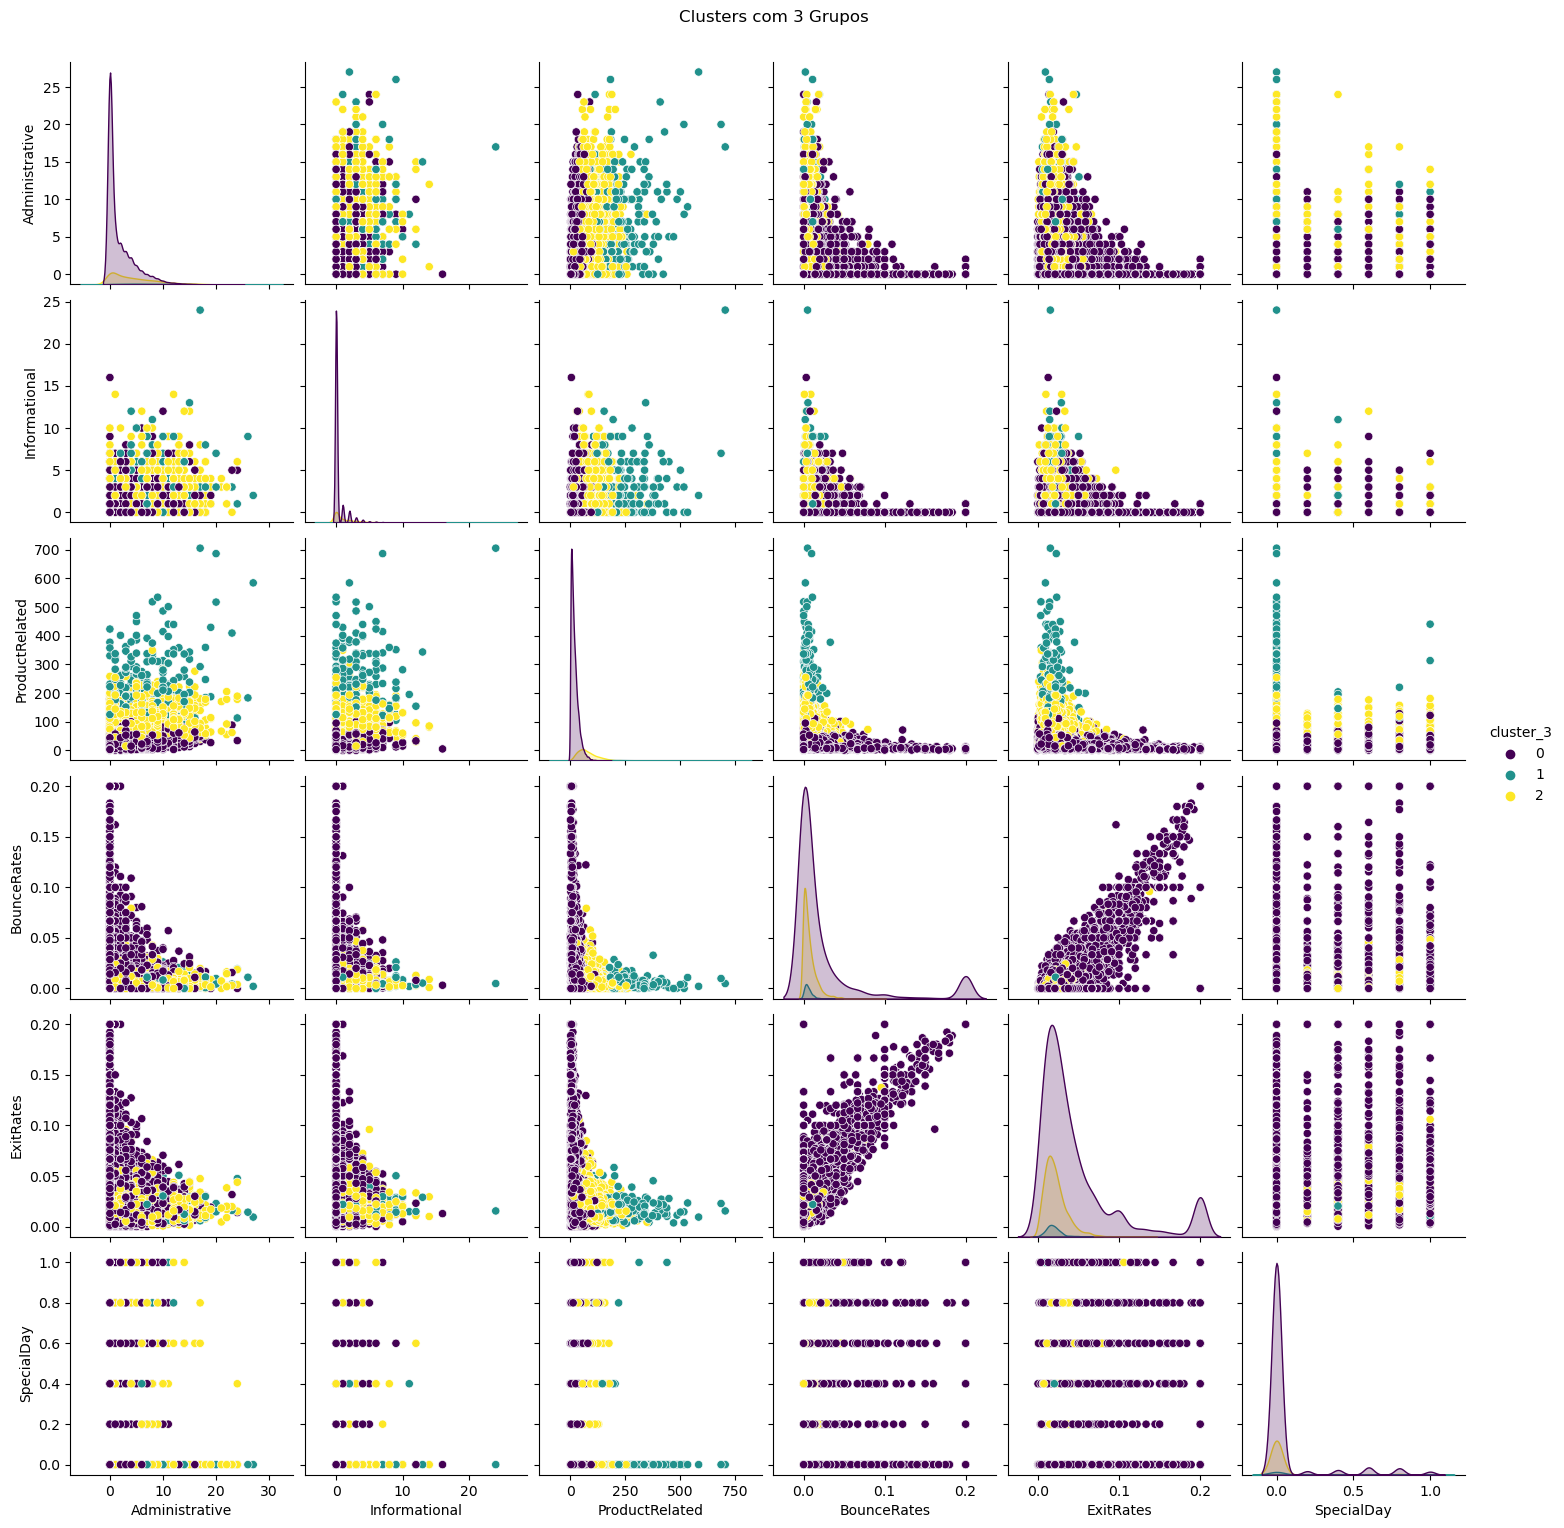

In [19]:
# Colunas especificadas
colunas = ['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates', 'SpecialDay']

# Pairplot para clusters com 2 grupos
sns.pairplot(df_qt[colunas + ['cluster_2']], hue='cluster_2', palette='viridis')
plt.suptitle('Clusters com 2 Grupos', y=1.02)
plt.show()

# Pairplot para clusters com 3 grupos
sns.pairplot(df_qt[colunas + ['cluster_3']], hue='cluster_3', palette='viridis')
plt.suptitle('Clusters com 3 Grupos', y=1.02)
plt.show()

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

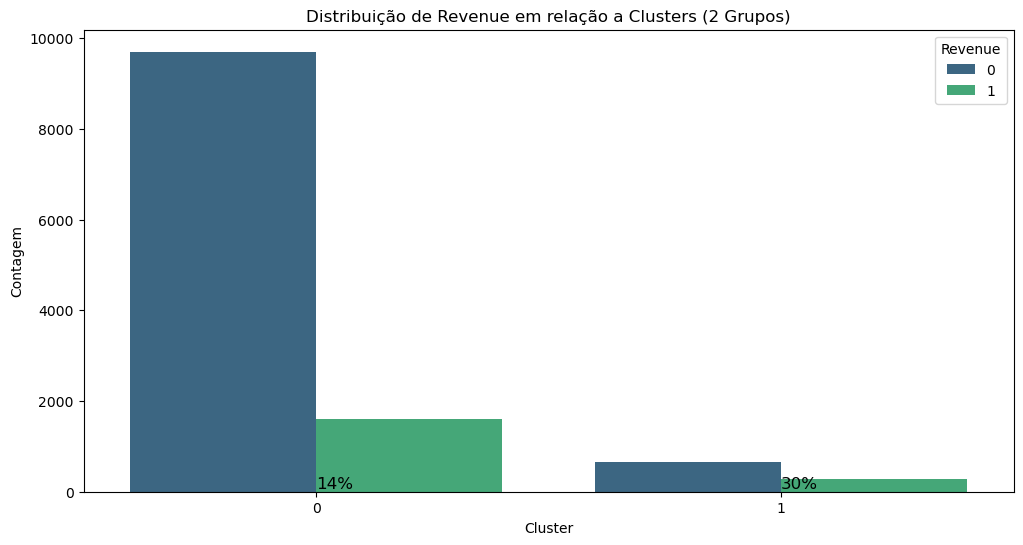

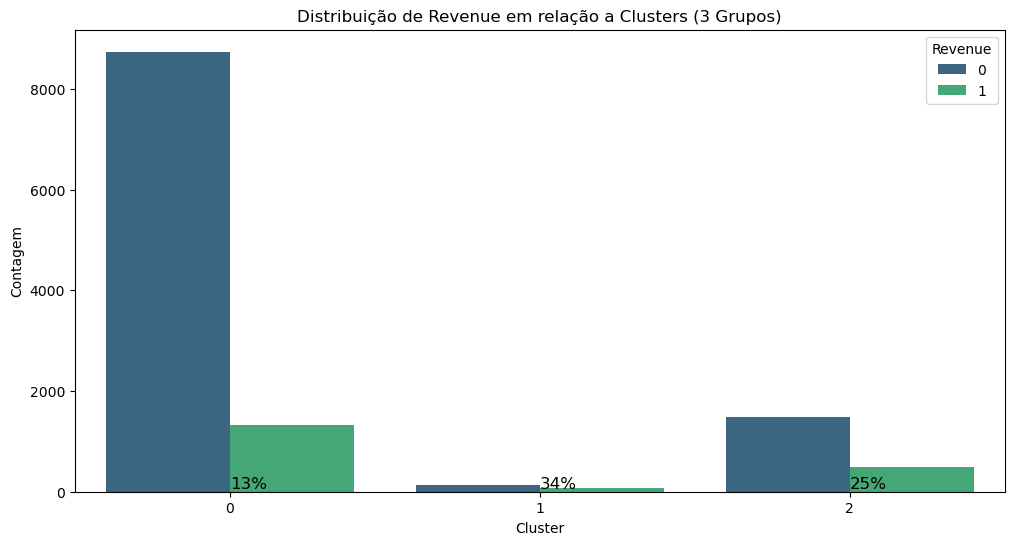

In [20]:
df_qt = df.drop(columns=['Revenue'])

# Rodar K-Means com 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
df['cluster_2'] = kmeans_2.fit_predict(df_qt)

# Rodar K-Means com 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df['cluster_3'] = kmeans_3.fit_predict(df_qt)

def add_percentage_labels(ax, data, cluster_col): 
    # Calcular as contagens e proporções
    counts = data.groupby([cluster_col, 'Revenue']).size().unstack(fill_value=0)
    props = counts.div(counts.sum(axis=1), axis=0)

    # Adicionar rótulos de porcentagem do Revenue=1
    for i in range(len(props)):
        total = counts.iloc[i].sum()
        revenue_1_prop = props.iloc[i].get(1, 0)  # Proporção de Revenue=1
        percentage = f'{revenue_1_prop:.0%}'
        ax.annotate(percentage, (i, revenue_1_prop / 2 + (props.iloc[i, :1].sum() if 1 > 0 else 0)),
                    ha='left', va='bottom', color='black', fontsize=12, weight='regular')

# Gráfico de barras empilhadas para clusters com 2 grupos
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='cluster_2', hue='Revenue', data=df, palette='viridis', ax=ax)
plt.title('Distribuição de Revenue em relação a Clusters (2 Grupos)')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Revenue')
add_percentage_labels(ax, df, 'cluster_2')
plt.show()

# Gráfico de barras empilhadas para clusters com 3 grupos
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='cluster_3', hue='Revenue', data=df, palette='viridis', ax=ax)
plt.title('Distribuição de Revenue em relação a Clusters (3 Grupos)')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Revenue')
add_percentage_labels(ax, df, 'cluster_3')
plt.show()

### No caso de 2 ou 3 clusters, o segundo cluster possui mais clientes propensos à compra. Respectivamente 30% e 34% dos clientes realizaram a compra, em cada caso.